In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [3]:
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("MedHouseVal")], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print(df.shape)
print(df.info())
display(df.describe())

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


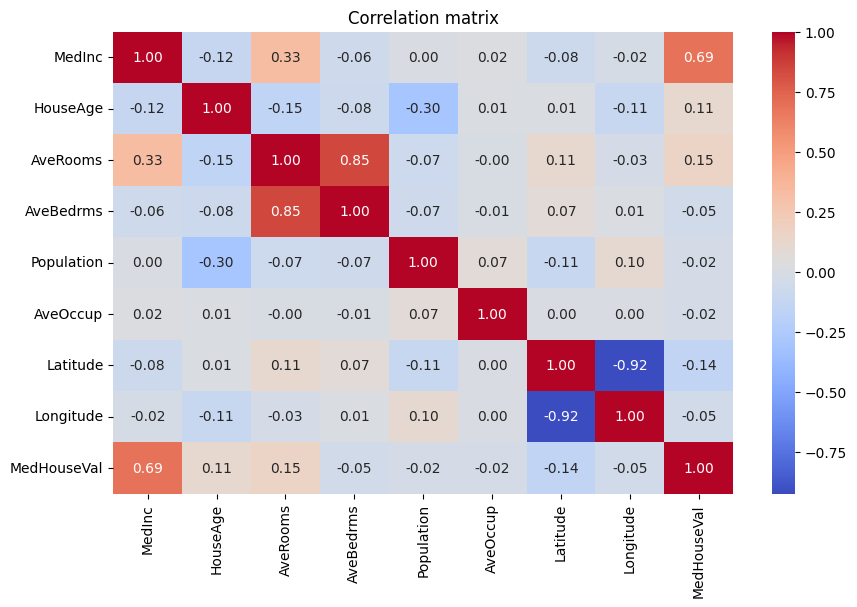

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


In [6]:
print("Missing values:\n", df.isna().sum())


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [7]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

In [8]:
print("Missing values:\n", df.isna().sum())

# Create features X and target y
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

# Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

print("Linear Regression:", regression_report(y_test, y_pred_lr))

Linear Regression: {'MSE': 0.5558915986952444, 'RMSE': np.float64(0.7455813830127764), 'MAE': 0.5332001304956553, 'R2': 0.5757877060324508}


In [10]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest (default):", regression_report(y_test, y_pred_rf))


Random Forest (default): {'MSE': 0.2553684927247781, 'RMSE': np.float64(0.5053399773665033), 'MAE': 0.3275425684593025, 'R2': 0.8051230593157366}


In [11]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20, None],
}
grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned RF:", regression_report(y_test, y_pred_best))


Best params: {'max_depth': 20, 'n_estimators': 100}
Tuned RF: {'MSE': 0.2558668230358652, 'RMSE': np.float64(0.505832801462959), 'MAE': 0.3279301684508226, 'R2': 0.8047427732223399}


Feature importances:
 MedInc        0.525868
AveOccup      0.138544
Latitude      0.089032
Longitude     0.088480
HouseAge      0.054323
AveRooms      0.044099
Population    0.030322
AveBedrms     0.029333
dtype: float64


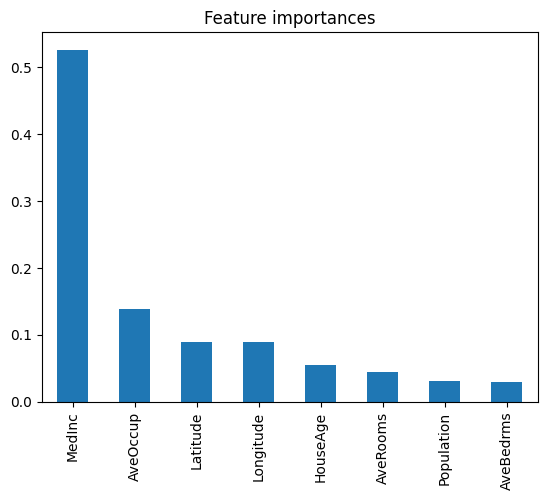

In [12]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances:\n", importances)
importances.plot(kind='bar')
plt.title("Feature importances")
plt.show()

In [13]:
joblib.dump(best_rf, "house_price_rf_model.joblib")
print("Saved model to house_price_rf_model.joblib")

Saved model to house_price_rf_model.joblib
